<a href="https://colab.research.google.com/github/javidee/LPNU-colab/blob/main/code/chap01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ThinkDSP

This notebook contains code examples from Chapter 1: Sounds and Signals

Copyright 2015 Allen Downey

License: [Creative Commons Attribution 4.0 International](http://creativecommons.org/licenses/by/4.0/)


In [1]:
# Get thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

--2025-03-27 09:37:47--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py [following]
--2025-03-27 09:37:47--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48554 (47K) [text/plain]
Saving to: ‘thinkdsp.py’

thinkdsp.py         100%[===================>]  47.42K  --.-KB/s    in 0.01s   

2025-03-27 09:37:47 (3.76 MB/s) - ‘thinkdsp.py’ saved [48554/48554]



In [3]:
from thinkdsp import CosSignal, SinSignal
from thinkdsp import decorate
from IPython.display import Audio
from thinkdsp import play_wave

`read_wave` reads WAV files.  The WAV examples in the book are from freesound.org.  In the contributors section of the book, I list and thank the people who uploaded the sounds I use.

In [4]:
filename = '100475__iluppai__saxophone-weep.wav'

if not os.path.exists(filename):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/100475__iluppai__saxophone-weep.wav

--2025-03-27 09:38:28--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/100475__iluppai__saxophone-weep.wav
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/100475__iluppai__saxophone-weep.wav [following]
--2025-03-27 09:38:29--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/100475__iluppai__saxophone-weep.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2071600 (2.0M) [audio/wav]
Saving to: ‘100475__iluppai__saxophone-weep.wav’

100475__iluppai__sa 100%[===================>]   1.98M  --.-KB/s    in 0.07s   

2025-03-27 09:38:29 (2

In [5]:
from thinkdsp import read_wave

wave = read_wave(filename)

In [6]:
wave.make_audio()

I pulled out a segment of this recording where the pitch is constant.  When we plot the segment, we can't see the waveform clearly, but we can see the "envelope", which tracks the change in amplitude during the segment.

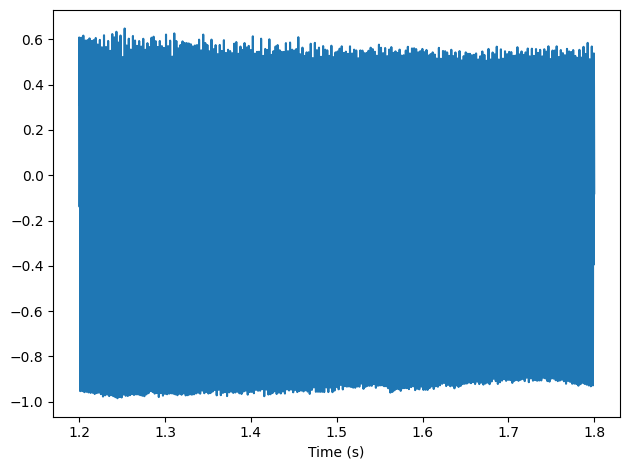

In [7]:
start = 1.2
duration = 0.6
segment = wave.segment(start, duration)
segment.plot()
decorate(xlabel='Time (s)')

In [8]:
spectrum = segment.make_spectrum()

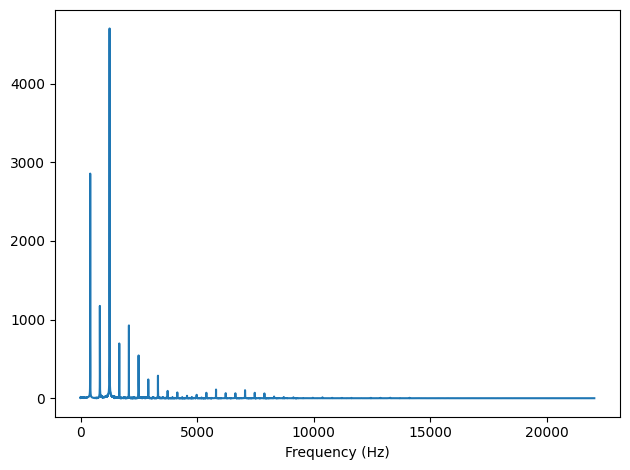

In [9]:
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

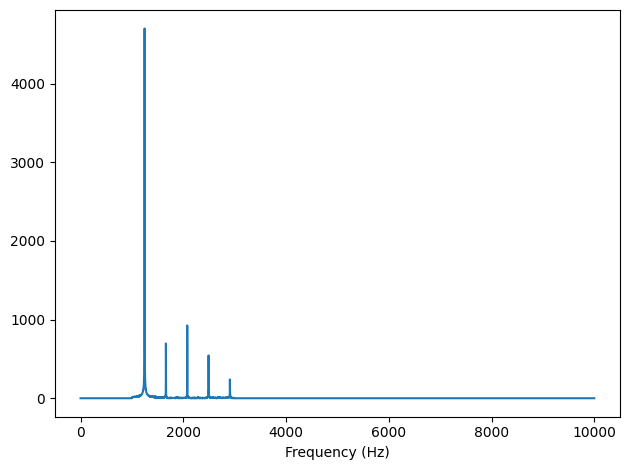

In [15]:
spectrum.plot(high=10000)
decorate(xlabel='Frequency (Hz)')

In [16]:
spectrum.low_pass(3000)
wave.make_audio()

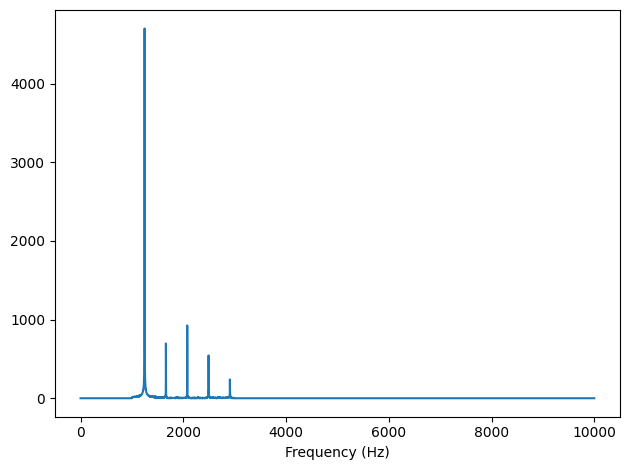

In [17]:
spectrum.plot(high=10000)
decorate(xlabel='Frequency (Hz)')

In [18]:
spectrum.high_pass(1000)
wave.make_audio()

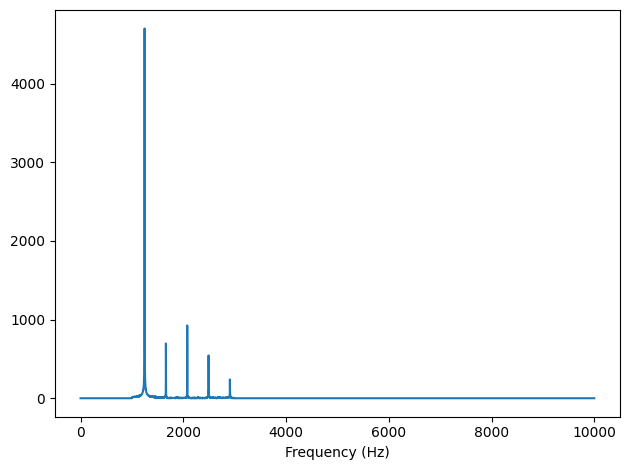

In [19]:
spectrum.plot(high=10000)
decorate(xlabel='Frequency (Hz)')

In [21]:
spectrum.band_stop(1000, 2000)
wave.make_audio()

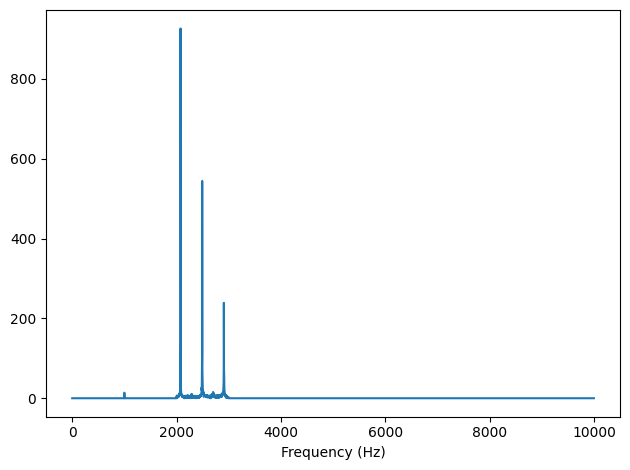

In [22]:
spectrum.plot(high=10000)
decorate(xlabel='Frequency (Hz)')

In [23]:
filtered = spectrum.make_wave()

In [24]:
filtered.normalize()

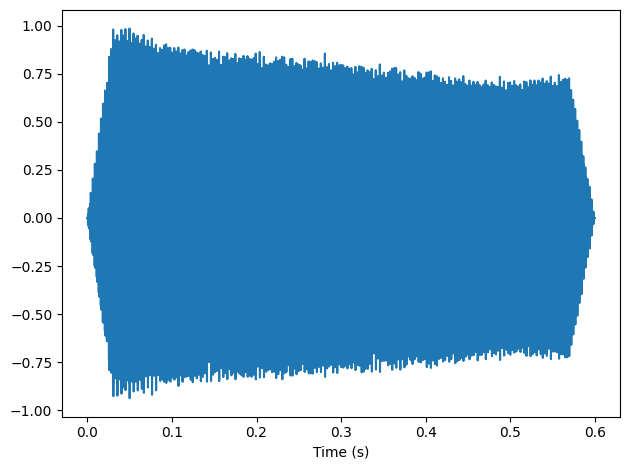

In [25]:
filtered.apodize()
filtered.plot()
decorate(xlabel='Time (s)')

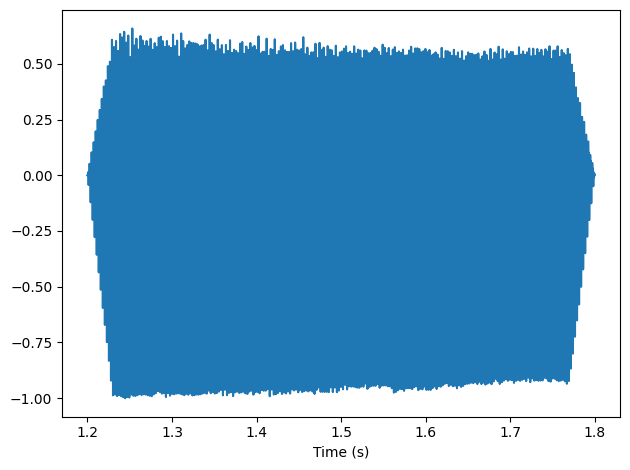

In [26]:
segment.normalize()
segment.apodize()
segment.plot()
decorate(xlabel='Time (s)')

In [27]:
segment.make_audio()

In [28]:
filtered.make_audio()

In [29]:
import matplotlib.pyplot as plt
from IPython.display import display

def filter_wave(wave, start, duration, cutoff):
    """Selects a segment from the wave and filters it.

    Plots the spectrum and displays an Audio widget.

    wave: Wave object
    start: time in s
    duration: time in s
    cutoff: frequency in Hz
    """
    segment = wave.segment(start, duration)
    spectrum = segment.make_spectrum()

    spectrum.plot(color='0.7')
    spectrum.low_pass(cutoff)
    spectrum.plot(color='#045a8d')
    decorate(xlabel='Frequency (Hz)')
    plt.show()

    audio = spectrum.make_wave().make_audio()
    display(audio)

In [30]:
from ipywidgets import interact, fixed

wave = read_wave('100475__iluppai__saxophone-weep.wav')
interact(filter_wave, wave=fixed(wave),
         start=(0, 5, 0.1), duration=(0, 5, 0.1), cutoff=(0, 10000, 100));

interactive(children=(FloatSlider(value=2.0, description='start', max=5.0), FloatSlider(value=2.0, description…